
Algorithm Performance Report:
   Input Size  Rabin-Karp Time (s)  KMP Time (s)  Boyer-Moore Time (s)  \
0        1000             0.059714      0.008528              0.012822   
1        2000             0.095118      0.020091              0.021152   
2        3000             0.164230      0.030744              0.036736   
3        4000             0.188331      0.047395              0.046001   
4        5000             0.236531      0.046221              0.053878   

   Rabin-Karp Comparisons  KMP Comparisons  Boyer-Moore Comparisons  
0                    5749             5775                     1729  
1                   11417            11455                     3382  
2                   20199            20274                     6114  
3                   22759            22856                     6894  
4                   28251            28365                     8555  


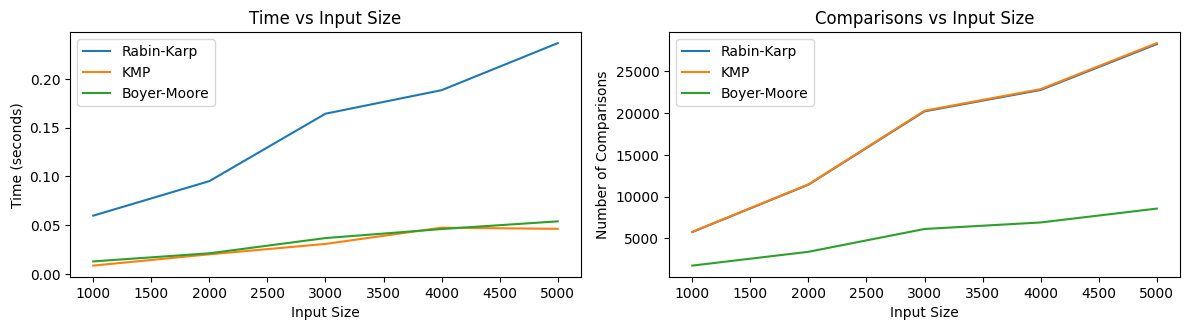

In [3]:
import time
import tracemalloc
import matplotlib.pyplot as plt
import pandas as pd

def read_file(filename):
    with open(filename, 'r') as file:
        return file.read().strip()

def generate_hash(s, a, q):
    h = 0
    for i in range(a):
        h = (h * 256 + ord(s[i])) % q
    return h

def match(pat, text, q):
    plen = len(pat)
    tlen = len(text)
    rm = 1
    pat_h = 0
    text_h = 0
    comparisons = 0
    occurrences = 0

    for i in range(plen - 1):
        rm = (rm * 256) % q

    pat_h = generate_hash(pat, plen, q)
    text_h = generate_hash(text, plen, q)

    for i in range(tlen - plen + 1):
        comparisons += 1
        if pat_h == text_h:
            occurrences += 1
            for j in range(plen):
                comparisons += 1
                if text[i + j] != pat[j]:
                    break
            else:
                continue

        if i < tlen - plen:
            text_h = (256 * (text_h - ord(text[i]) * rm) + ord(text[i + plen])) % q
            if text_h < 0:
                text_h += q

    return comparisons, occurrences

def execute_rabin_karp(pat, text):
    comparisons, occurrences = match(pat, text, 101)
    return comparisons, occurrences

def compute_lps_array(pat):
    m = len(pat)
    lps = [0] * m
    len_prefix_suffix = 0
    i = 1

    while i < m:
        if pat[i] == pat[len_prefix_suffix]:
            len_prefix_suffix += 1
            lps[i] = len_prefix_suffix
            i += 1
        else:
            if len_prefix_suffix:
                len_prefix_suffix = lps[len_prefix_suffix - 1]
            else:
                lps[i] = 0
                i += 1

    return lps

def execute_kmp(pat, text):
    comparisons = 0
    occurrences = 0
    m = len(pat)
    n = len(text)

    lps = compute_lps_array(pat)
    i = j = 0

    while i < n:
        comparisons += 1
        if pat[j] == text[i]:
            i += 1
            j += 1

            if j == m:
                occurrences += 1
                j = lps[j - 1]
        else:
            if j:
                j = lps[j - 1]
            else:
                i += 1

    return comparisons, occurrences

def execute_boyer_moore(pat, text):
    comparisons = 0
    occurrences = 0
    m = len(pat)
    n = len(text)
    last_occurrence = {pat[i]: i for i in range(m)}

    i = 0

    while i <= n - m:
        j = m - 1

        while j >= 0 and pat[j] == text[i + j]:
            comparisons += 1
            j -= 1

        if j < 0:
            occurrences += 1

            if i + m < n:
                i += m - last_occurrence.get(text[i + m], -1)
            else:
                i += 1
        else:
            comparisons += 1
            i += max(1, j - last_occurrence.get(text[i + j], -1))

    return comparisons, occurrences

input_sizes = [1000, 2000, 3000, 4000, 5000]

time_taken_rk = []
comparisons_rk = []
occurrences_rk = []

time_taken_kmp = []
comparisons_kmp = []
occurrences_kmp = []

time_taken_bm = []
comparisons_bm = []
occurrences_bm = []

for size in input_sizes:
    pattern = "with"  
    text_filename = f"input_{size}.txt"
    
    text = read_file(text_filename)

    # Rabin-Karp
    tracemalloc.start()
    start_time = time.time()
    comparisons, occurrences = execute_rabin_karp(pattern, text)
    tracemalloc.stop()
    end_time = time.time()
    time_taken_rk.append(end_time - start_time)
    comparisons_rk.append(comparisons)

    # KMP
    tracemalloc.start()
    start_time = time.time()
    comparisons, occurrences = execute_kmp(pattern, text)
    tracemalloc.stop()
    end_time = time.time()
    time_taken_kmp.append(end_time - start_time)
    comparisons_kmp.append(comparisons)

    # Boyer-Moore
    tracemalloc.start()
    start_time = time.time()
    comparisons, occurrences = execute_boyer_moore(pattern, text)
    tracemalloc.stop()
    end_time = time.time()
    time_taken_bm.append(end_time - start_time)
    comparisons_bm.append(comparisons)


# Create a DataFrame for the report
data = {
    'Input Size': input_sizes,
    'Rabin-Karp Time (s)': time_taken_rk,
    'KMP Time (s)': time_taken_kmp,
    'Boyer-Moore Time (s)': time_taken_bm,
    'Rabin-Karp Comparisons': comparisons_rk,
    'KMP Comparisons': comparisons_kmp,
    'Boyer-Moore Comparisons': comparisons_bm
}

df = pd.DataFrame(data)

# Print the report
print("\nAlgorithm Performance Report:")
print(df)

# Plotting graphs
plt.figure(figsize=(12, 6))

# Time vs Input Size
plt.subplot(2, 2, 1)
plt.plot(input_sizes, time_taken_rk, label='Rabin-Karp')
plt.plot(input_sizes, time_taken_kmp, label='KMP')
plt.plot(input_sizes, time_taken_bm, label='Boyer-Moore')
plt.title('Time vs Input Size')
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.legend()

# Comparisons vs Input Size
plt.subplot(2, 2, 2)
plt.plot(input_sizes, comparisons_rk, label='Rabin-Karp')
plt.plot(input_sizes, comparisons_kmp, label='KMP')
plt.plot(input_sizes, comparisons_bm, label='Boyer-Moore')
plt.title('Comparisons vs Input Size')
plt.xlabel('Input Size')
plt.ylabel('Number of Comparisons')
plt.legend()

plt.tight_layout()
plt.show()
